## Customer Churn Analysis

- Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#Importing Necessary Libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading Dataset

df = pd.read_csv(r"E:\Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

#Dataset contains 7043 rows and 21 columns

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Only 3 columns are of float and int type rest all are object type.

In [34]:
#Coverting Total charges into numeric data type :
df['TotalCharges']=df['TotalCharges'].str.strip()
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [37]:
# Filling Total Charges null value with mean :

df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Checking uniqueness

for i in df.columns:
    print (i,':',len(df[i].unique()))

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


In [11]:
#Printing Value counts

print (df['gender'].value_counts())
print('*'*70)
print (df['SeniorCitizen'].value_counts())
print('*'*70)
print (df['Partner'].value_counts())
print('*'*70)
print (df['Dependents'].value_counts())
print('*'*70)
print (df['MultipleLines'].value_counts())
print('*'*70)
print (df['InternetService'].value_counts())
print('*'*70)
print (df['OnlineBackup'].value_counts())
print('*'*70)
print (df['OnlineSecurity'].value_counts())
print('*'*70)
print (df['DeviceProtection'].value_counts())
print('*'*70)
print (df['TechSupport'].value_counts())
print('*'*70)
print (df['StreamingMovies'].value_counts())
print('*'*70)
print (df['StreamingTV'].value_counts())
print('*'*70)
print (df['Contract'].value_counts())
print('*'*70)
print (df['PaperlessBilling'].value_counts())
print('*'*70)
print (df['PaymentMethod'].value_counts())
print('*'*70)
print (df['Churn'].value_counts())
print('*'*70)

Male      3555
Female    3488
Name: gender, dtype: int64
**********************************************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
**********************************************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
**********************************************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
**********************************************************************
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
**********************************************************************
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
**********************************************************************
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
**********************************

# Data Visualisation and Preprocessing

<AxesSubplot:xlabel='Churn', ylabel='count'>

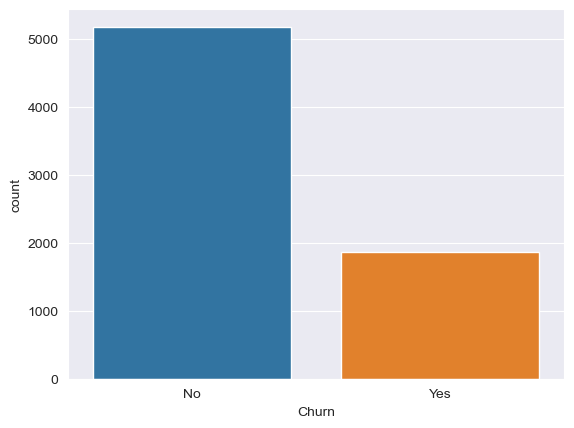

In [155]:
sns.countplot(x='Churn',data=df)

- Customer who are not churned is more.

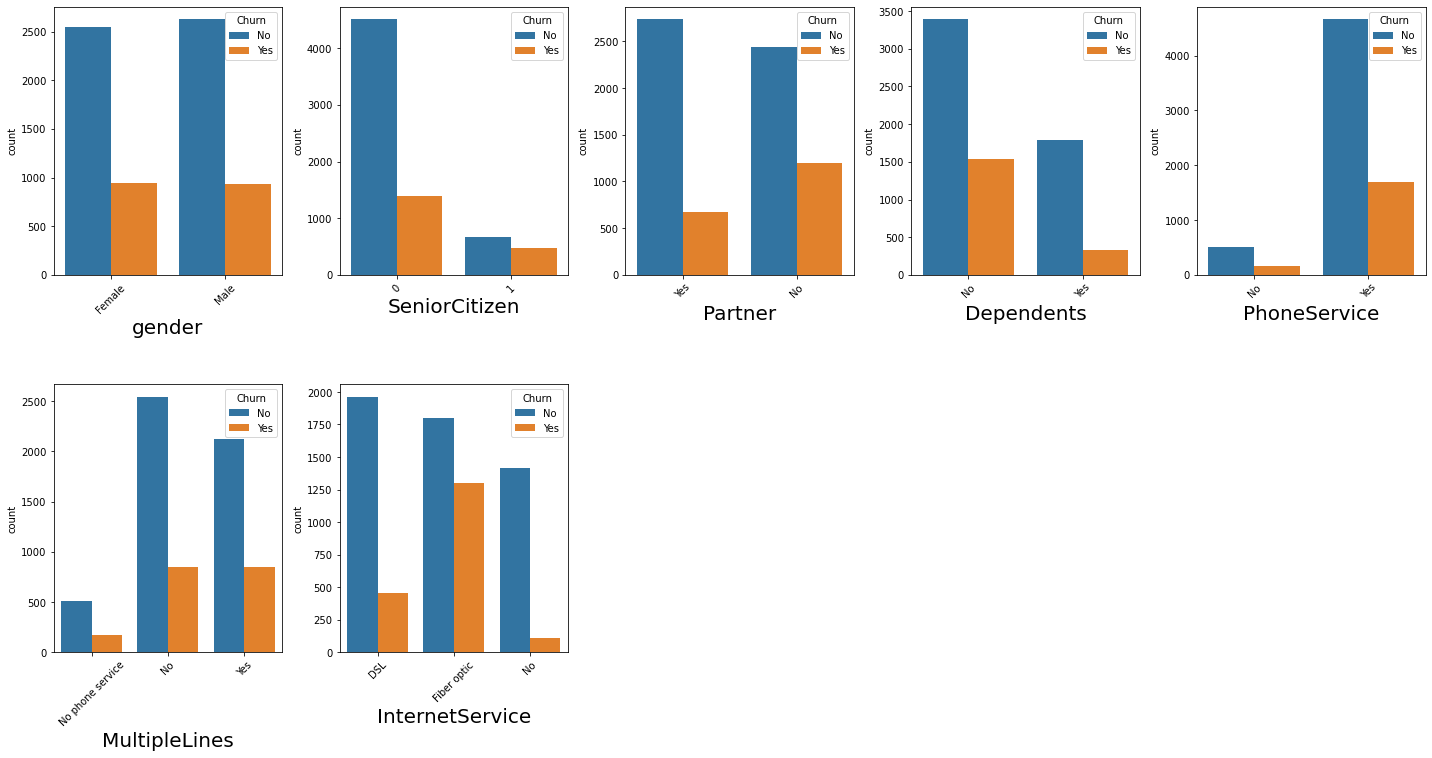

In [31]:
col = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService']]

plt.figure(figsize=(20,25))
plotnumber=1

for column in col:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(col[column],hue=df.Churn)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

- Both Male and Female are almost equally churned.
- Churn rate of Senior Citizens are high.
- Customer without partner has more Churn rate.
- Churn Rate is high for no dependents.
- Churn Rate is high for Phone Service
- For those who have fiber optic Internet , churn rate is very high.
- Customers are churned equally for having or not having multiple lines but, less chured if they do not have phone service

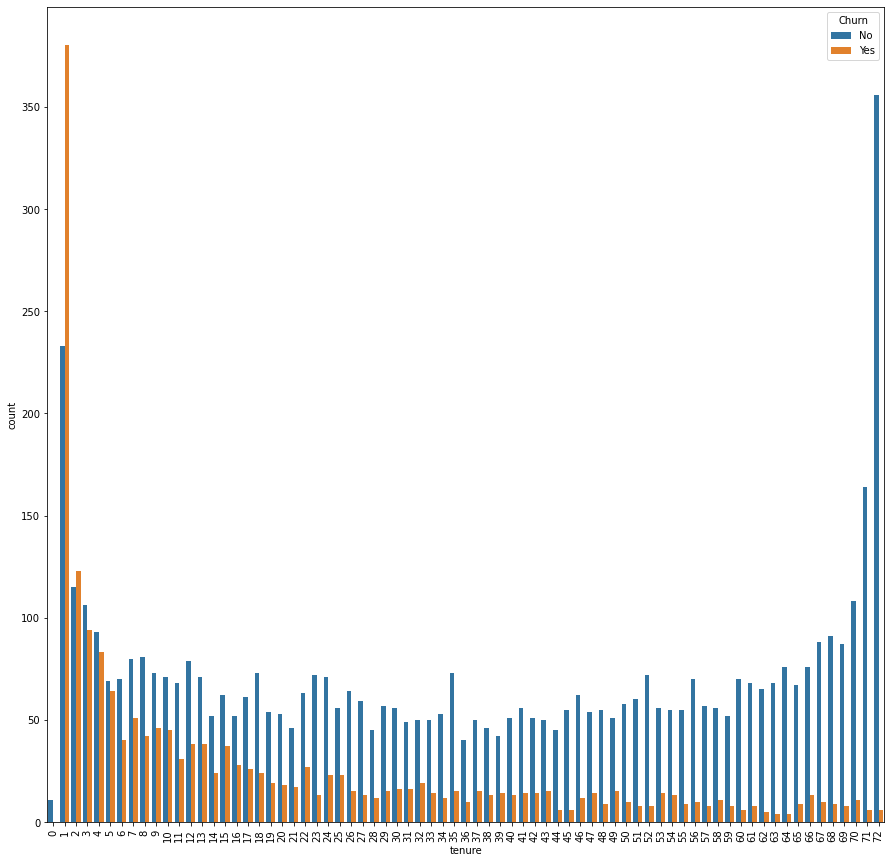

In [39]:
plt.figure(figsize=(15,15))
sns.countplot(x='tenure',data=df,hue='Churn')
plt.xticks(rotation=90)
plt.show()

- Churn Rate is very high for lesser tenure period.

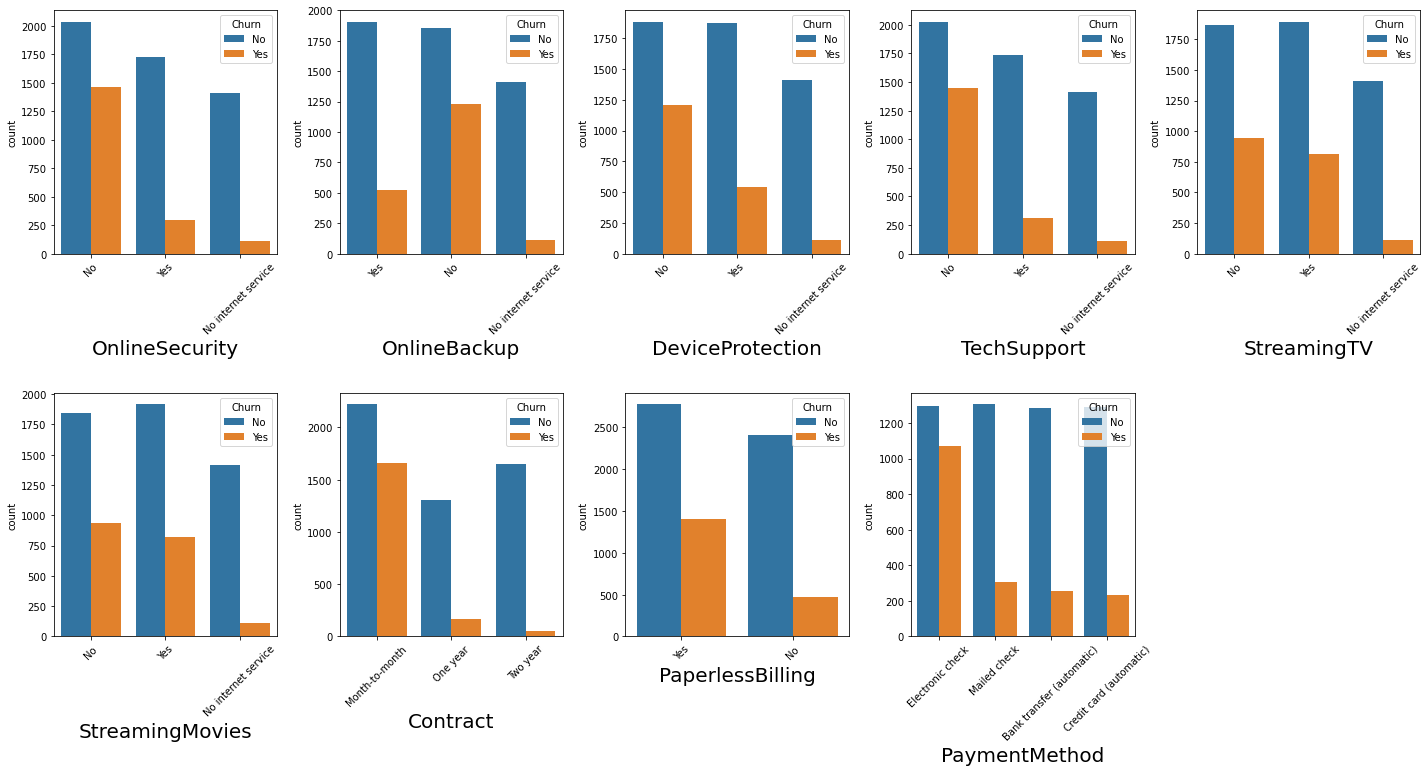

In [43]:
col2=df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]

plt.figure(figsize=(20,25))
plotnumber=1

for column in col2:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(col2[column],hue=df.Churn)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

#### Customer are churned if there is No :
- Online security,Online Backup,Device Protection,Tech Support,Streaming TV and Movies.

#### Customers are less churned if there is :

- Automatic Payments
- Yearly Contract
- No internet service

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

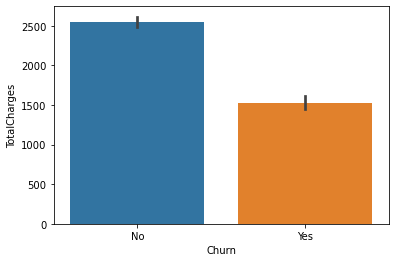

In [40]:
sns.barplot(x='Churn',y='TotalCharges',data=df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

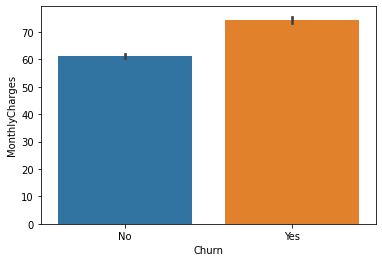

In [41]:
sns.barplot(x='Churn',y='MonthlyCharges',data=df)

In [46]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
df1 = df.drop(columns=['customerID'],axis=1)
#Dropped column 'customer ID' as it has nothing informative for our dataset.

In [50]:
#Label Encoding

#Encoding object data into integer using Label Encoder

label_col = ['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df1[label_col]=df1[label_col].apply(lambda x : label.fit_transform(x))

In [51]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [54]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<Figure size 1440x1800 with 0 Axes>

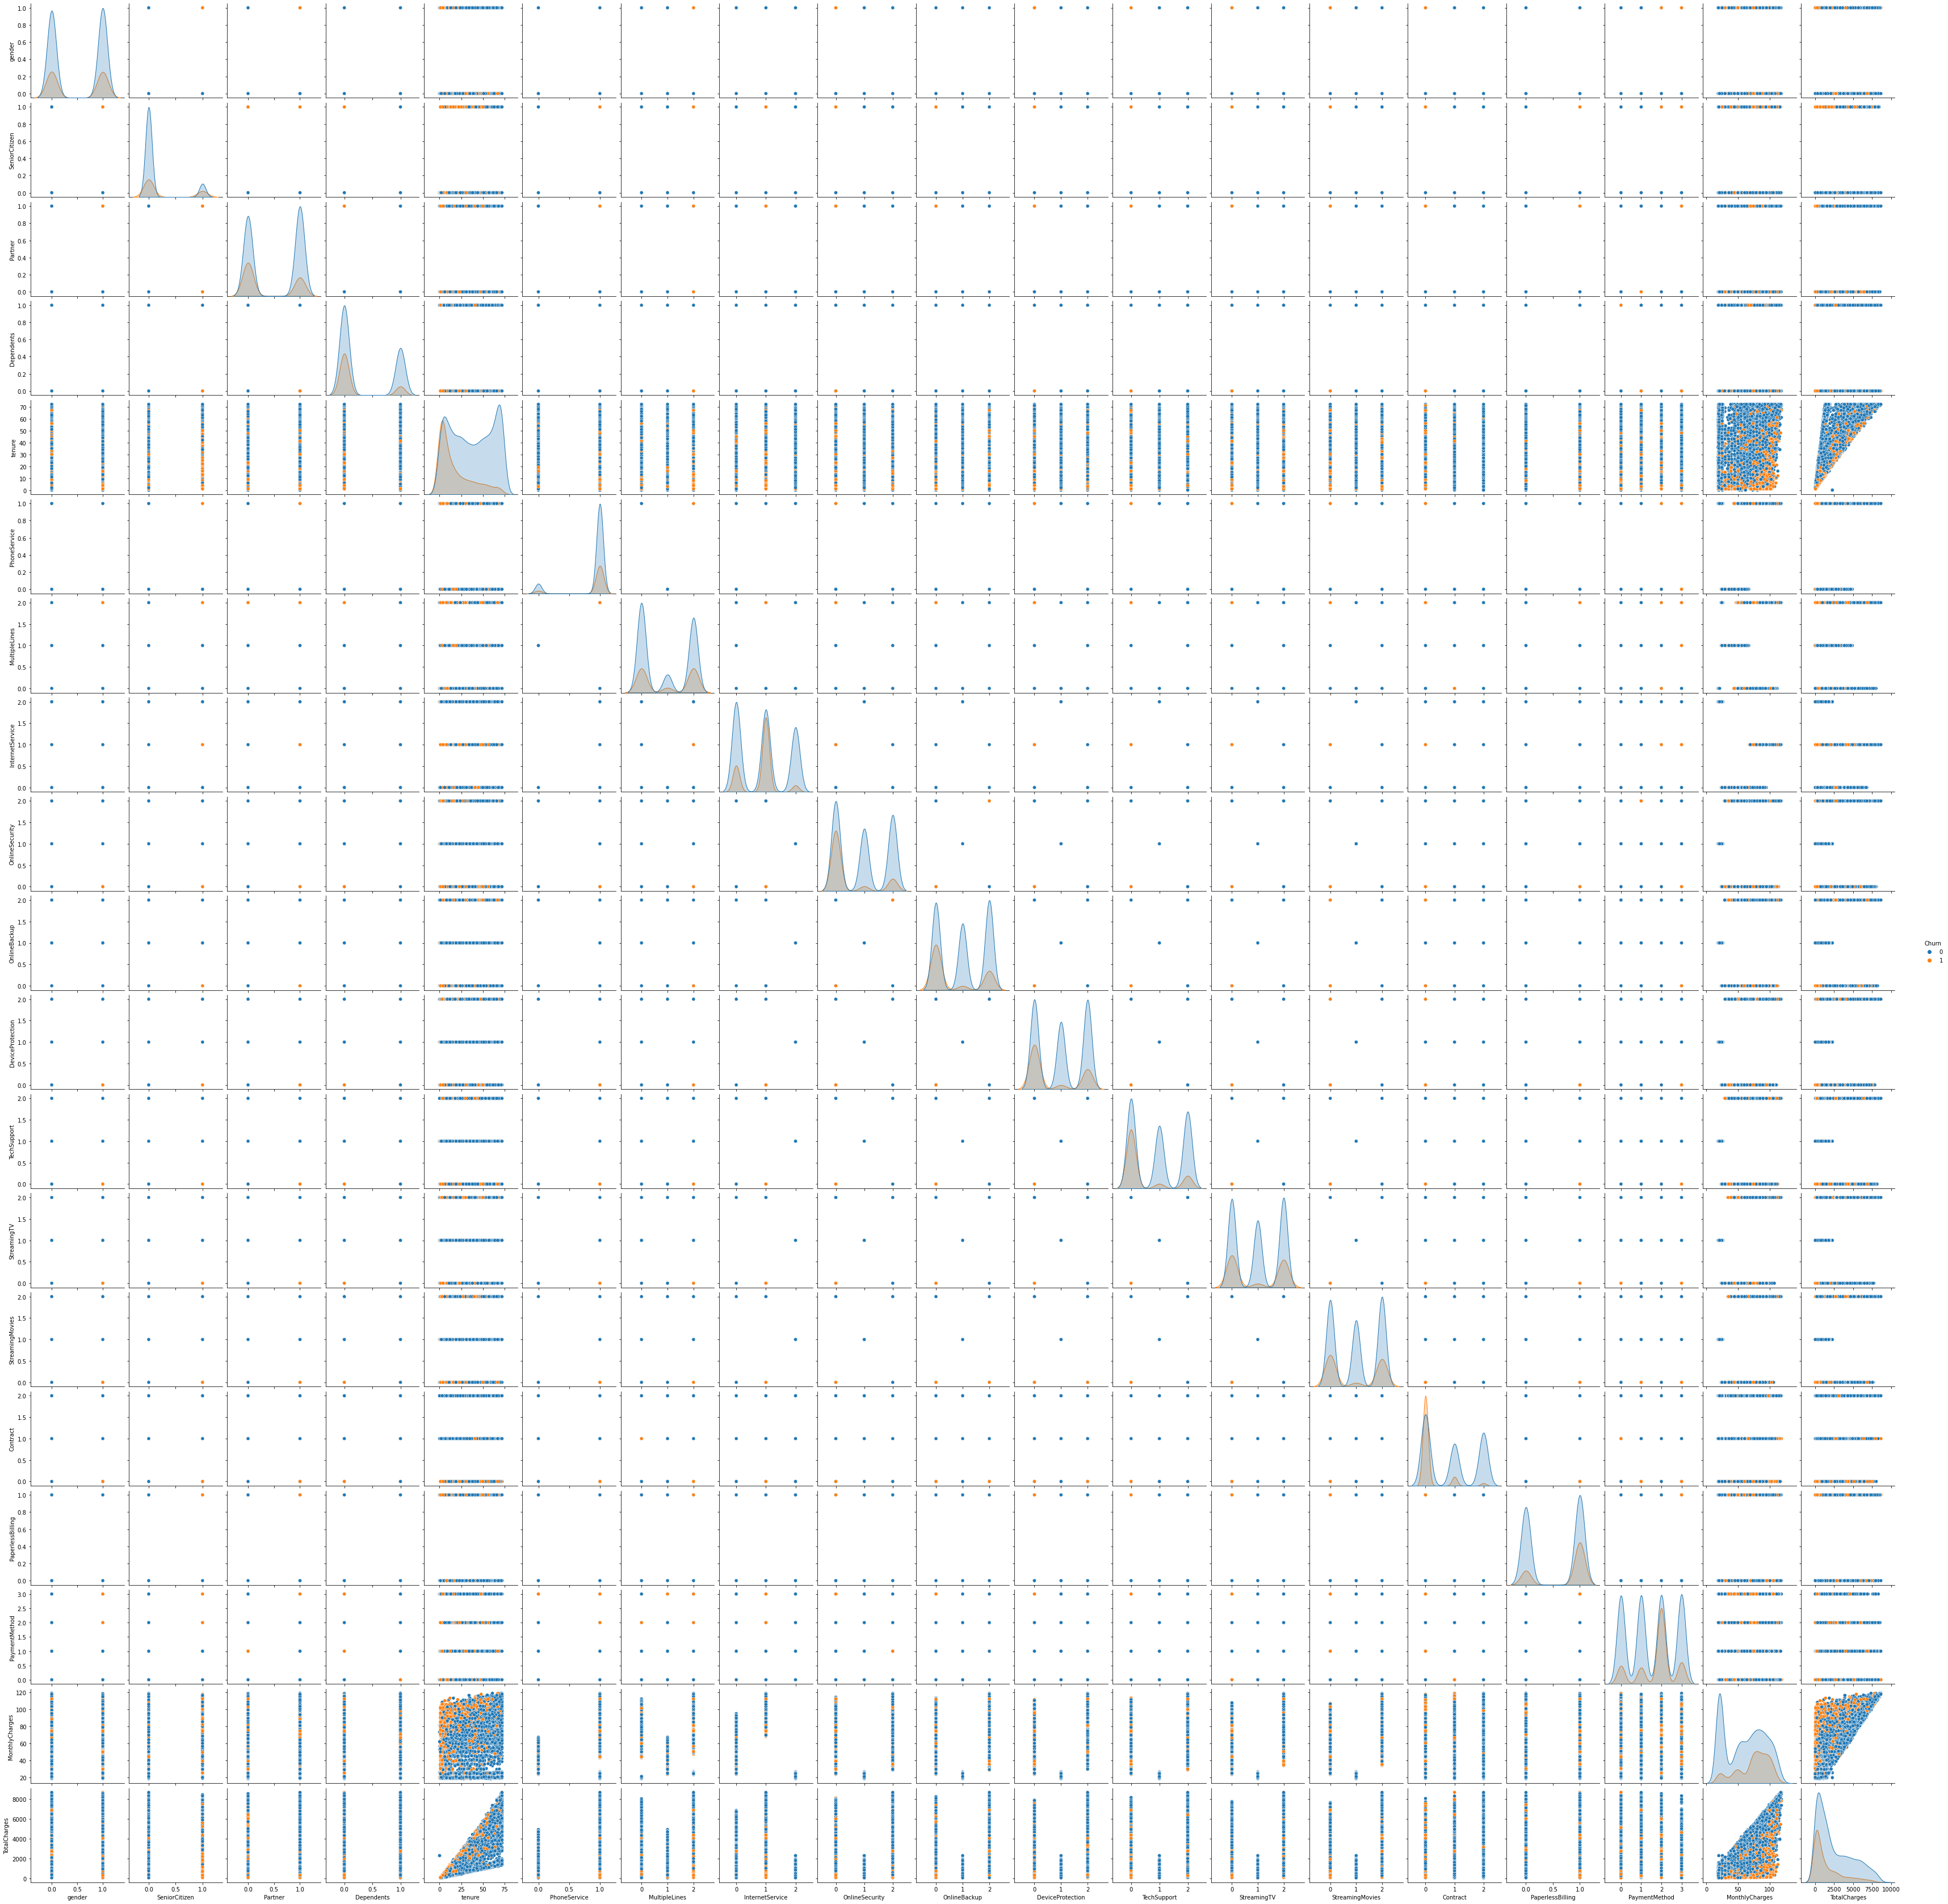

In [58]:
#Plotting Pair Plot


plt.figure(figsize=(20,25))
sns.pairplot(df1,hue='Churn',diag_kind='kde')
plt.show()

##### Comparing target with features using Bar Plot.

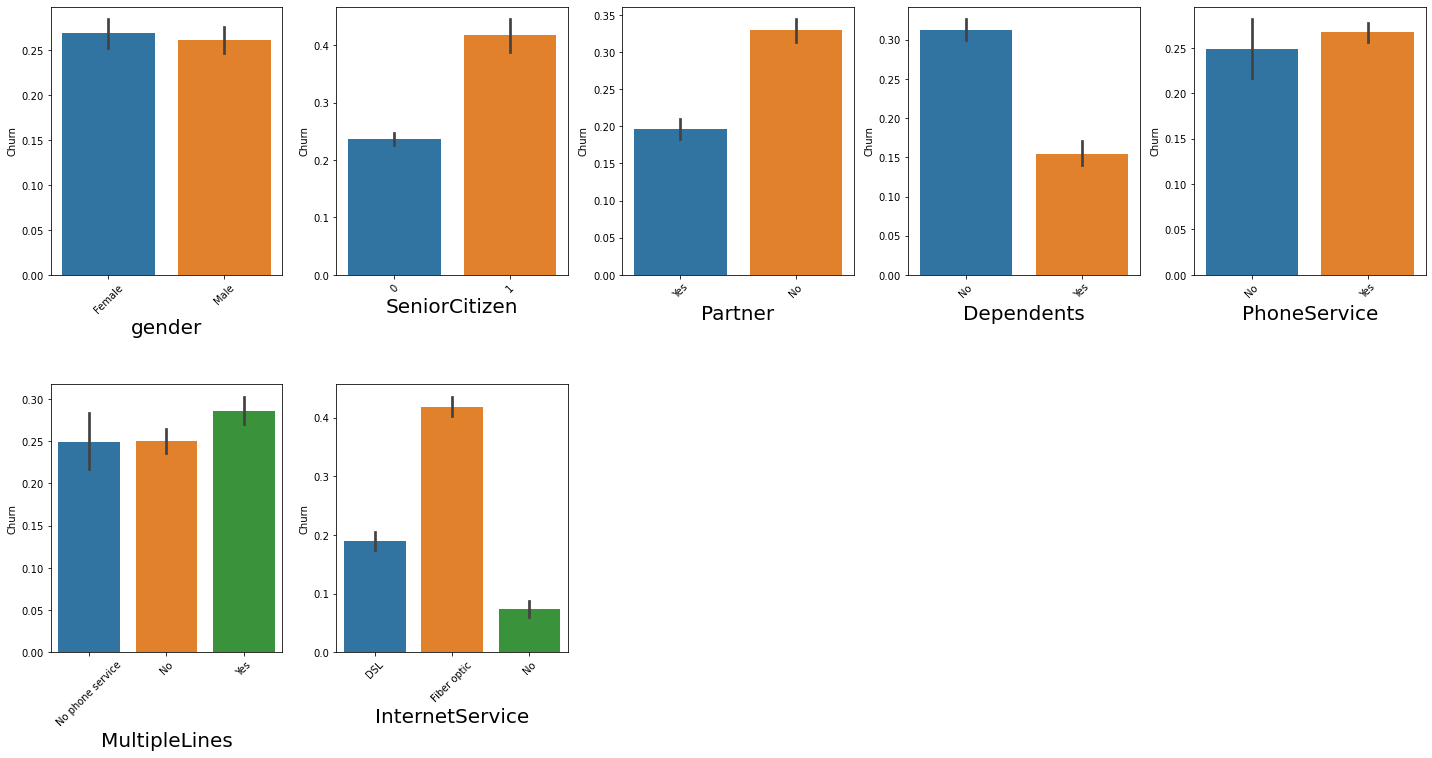

In [74]:
col3 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService']]

plt.figure(figsize=(20,25))
plotnumber=1

for column in col:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(col3[column],y=df1.Churn)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

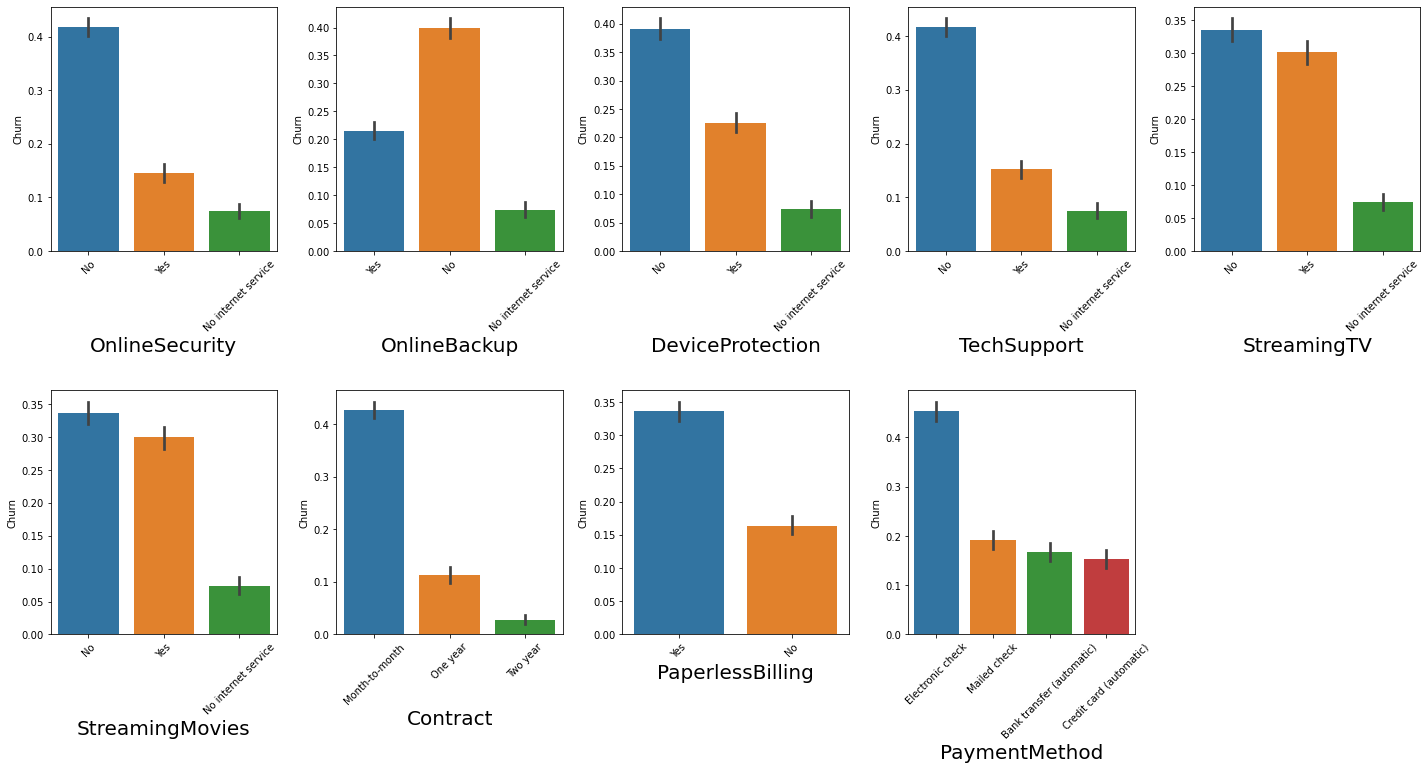

In [71]:
col4=df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]

plt.figure(figsize=(20,25))
plotnumber=1

for column in col4:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(col4[column],y=df1.Churn)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

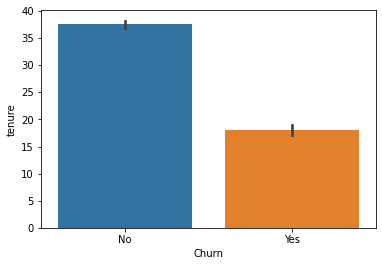

In [72]:
sns.barplot(x='Churn',y='tenure',data=df)

- For high tenure , Churn is less.

##### Multivariate Analysis

<AxesSubplot:xlabel='Dependents', ylabel='TotalCharges'>

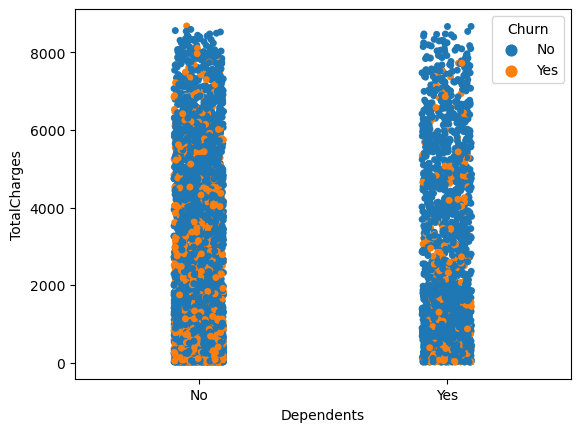

In [78]:
plt.style.use('default')
sns.stripplot(x="Dependents", y="TotalCharges", hue="Churn",data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='TotalCharges'>

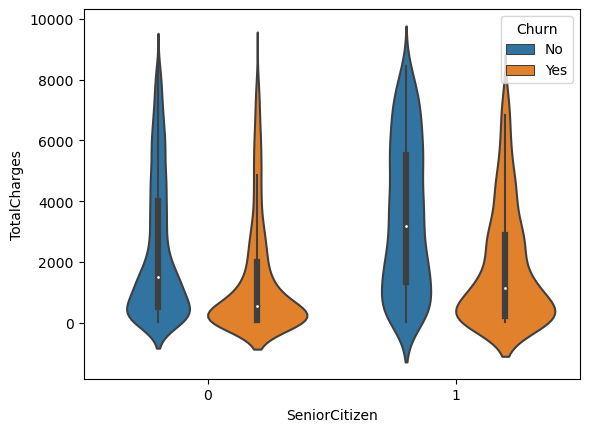

In [81]:
plt.style.use('default')
sns.violinplot(x="SeniorCitizen", y="TotalCharges", hue="Churn",data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

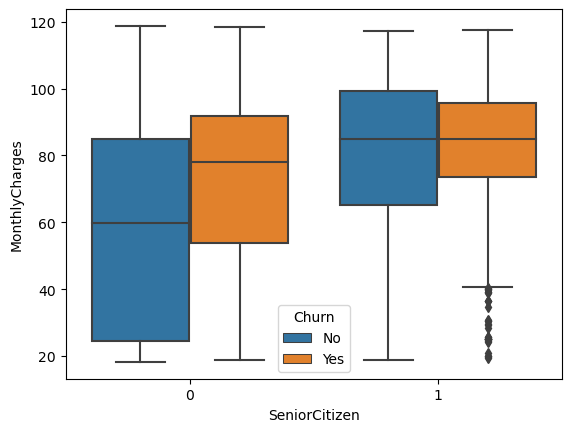

In [87]:
plt.style.use('default')
sns.boxplot(x="SeniorCitizen", y="MonthlyCharges", hue="Churn",data=df)

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

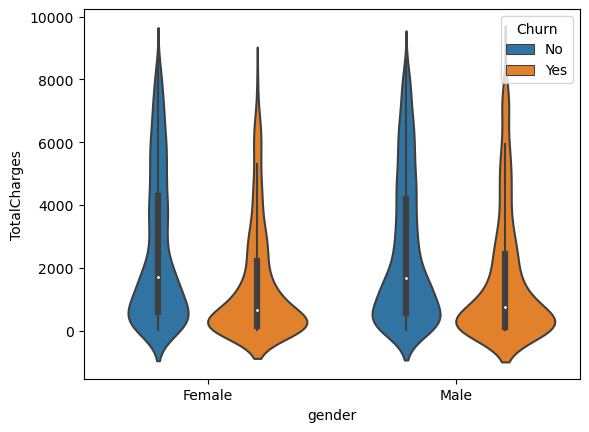

In [85]:
plt.style.use('default')
sns.violinplot(x="gender", y="TotalCharges", hue="Churn",data=df)

<AxesSubplot:xlabel='InternetService', ylabel='TotalCharges'>

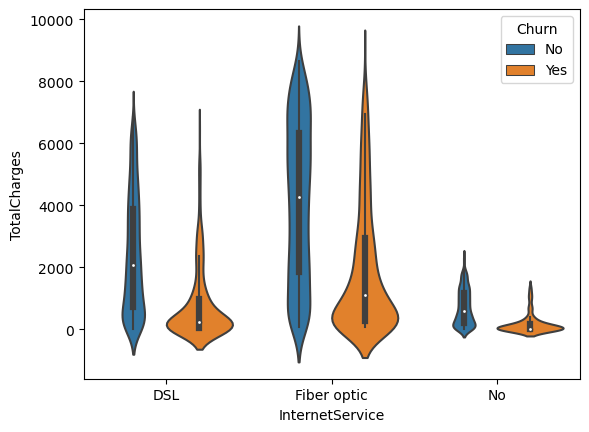

In [109]:
plt.style.use('default')
sns.violinplot(x="InternetService", y="TotalCharges", hue="Churn",data=df)

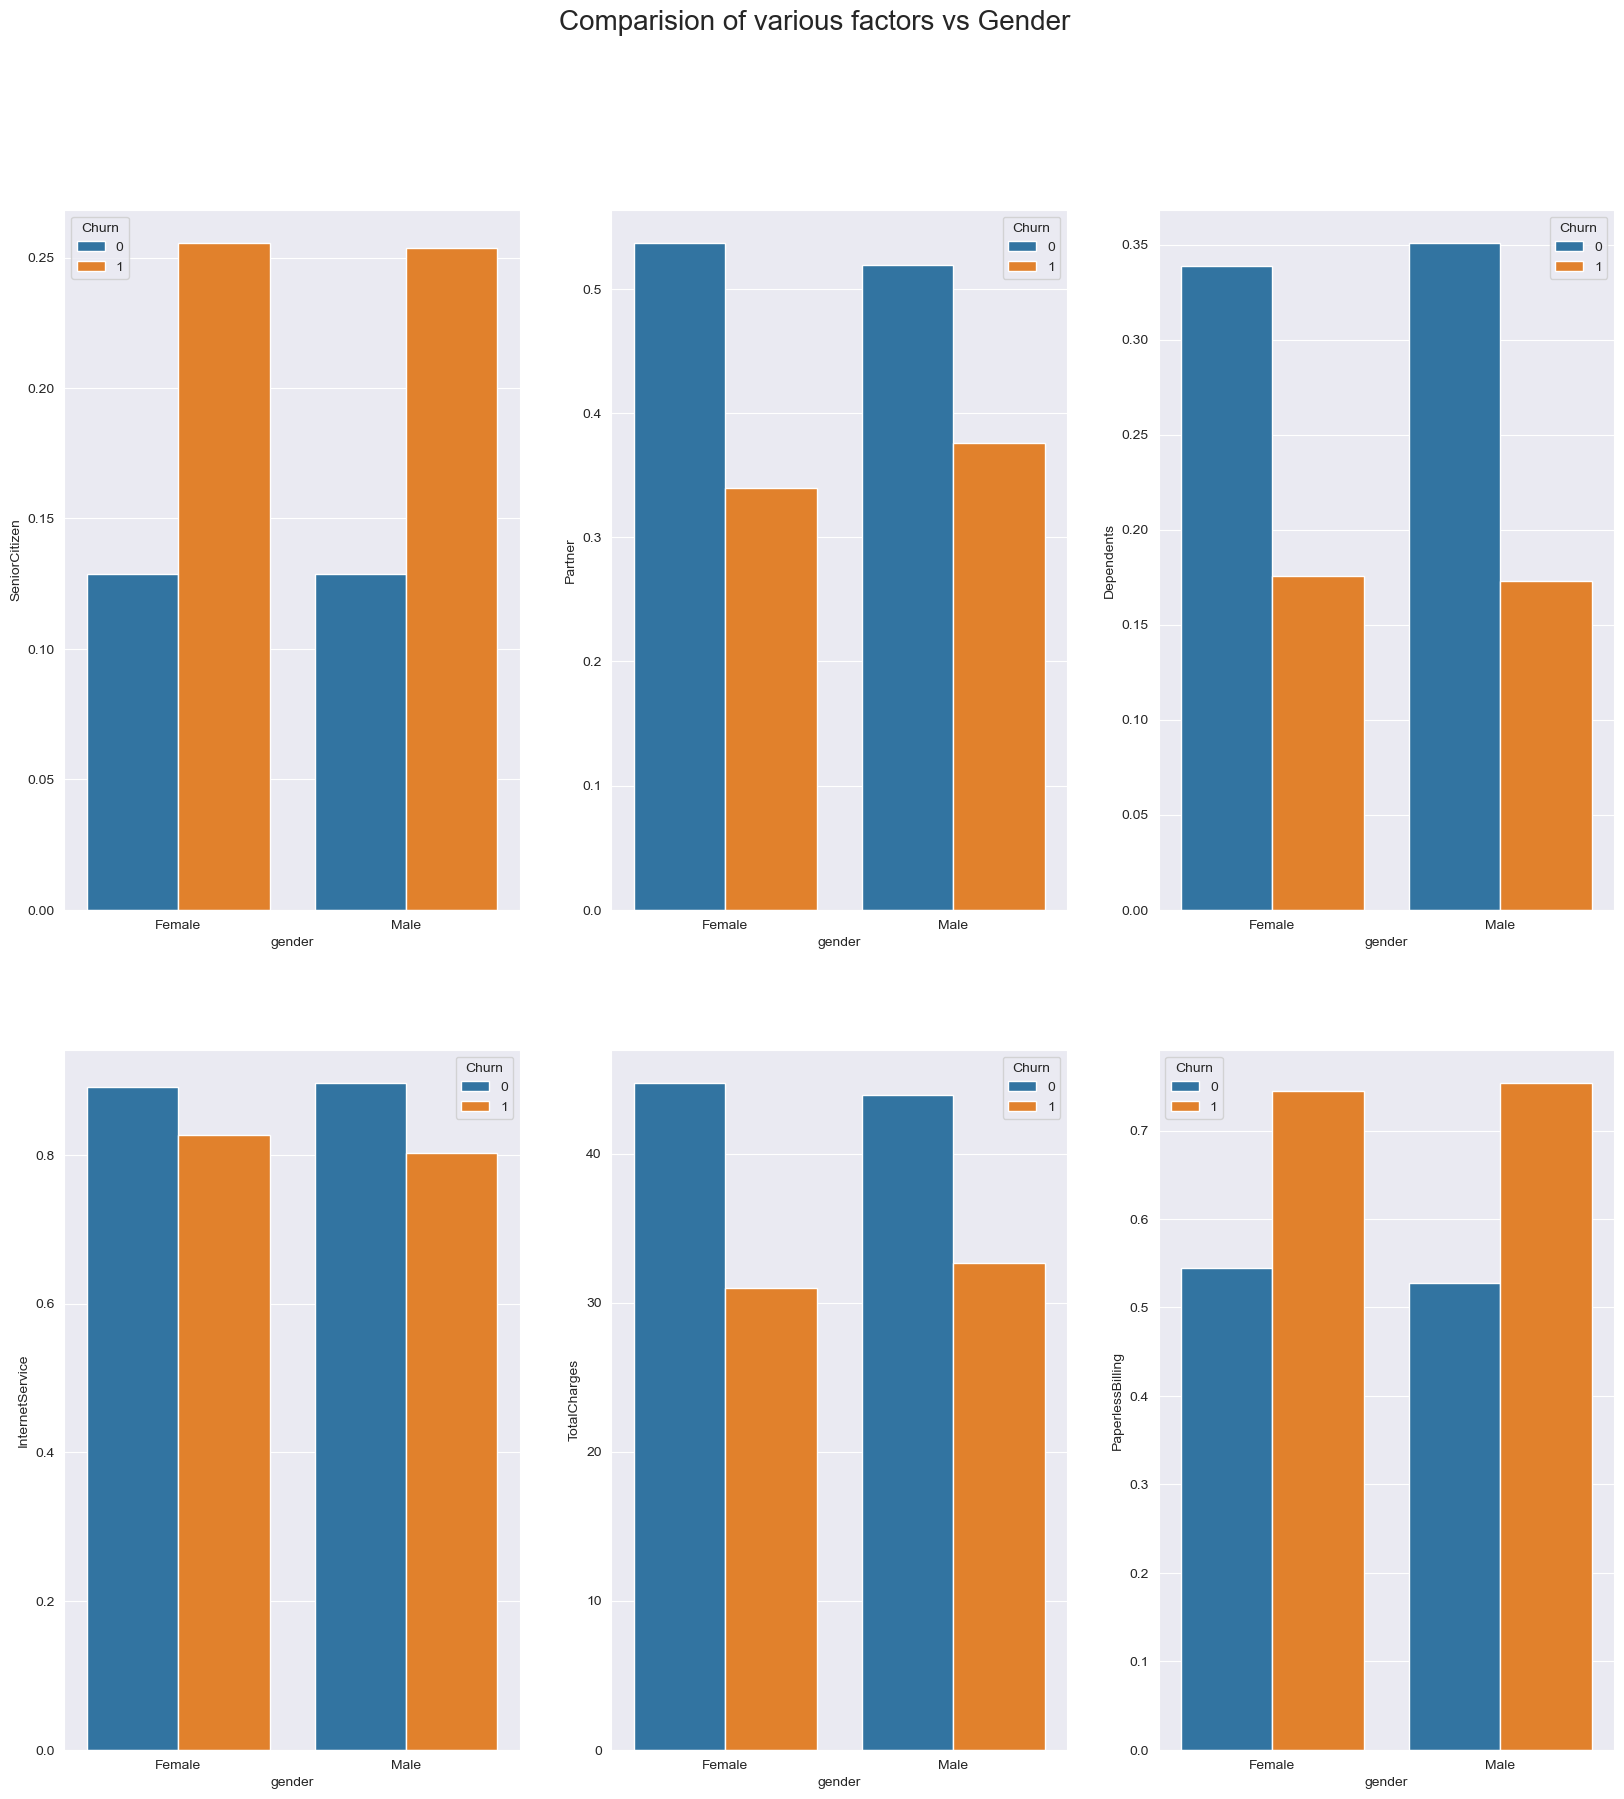

In [154]:
fig,ax = plt.subplots(2,3,figsize=(20,20))           
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(df['gender'],df1['SeniorCitizen'],hue = df1['Churn'], ax = ax[0,0],ci=None); 
sns.barplot(df['gender'],df1['Partner'],hue = df1['Churn'], ax = ax[0,1],ci=None); 
sns.barplot(df['gender'],df1['Dependents'],hue = df1['Churn'], ax = ax[0,2],ci=None); 
sns.barplot(df['gender'],df1['InternetService'],hue = df1['Churn'], ax = ax[1,0],ci=None); 
sns.barplot(df['gender'],df1['TotalCharges'],hue = df1['Churn'], ax = ax[1,1],ci=None); 
sns.barplot(df['gender'],df1['PaperlessBilling'],hue = df1['Churn'], ax = ax[1,2],ci=None); 
plt.show()

### Checking for Outliers Using Box Plot

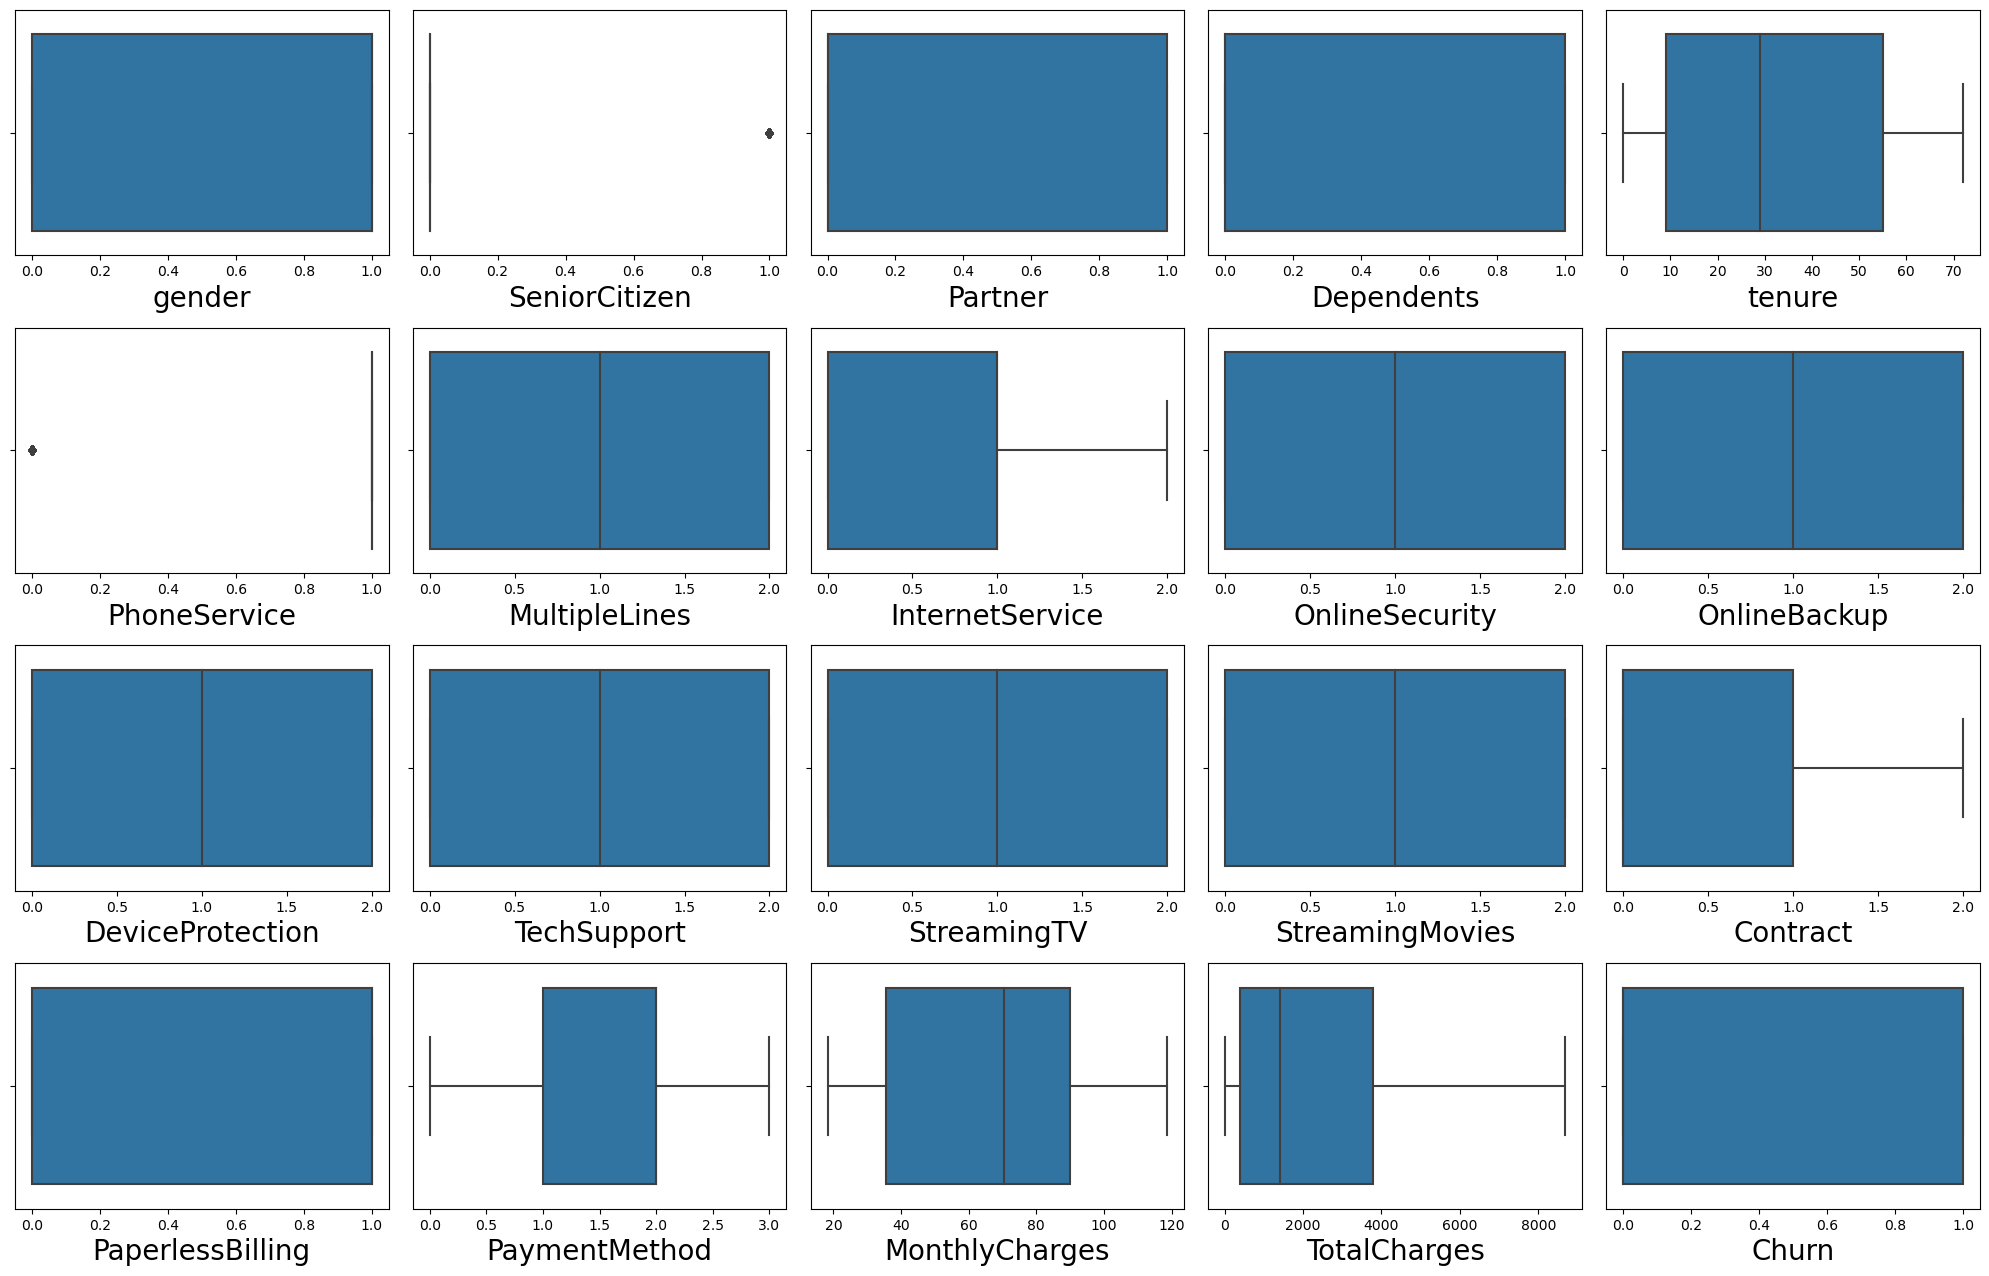

In [97]:

plt.figure(figsize=(20,25))
plotnumber=1

for column in df1:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Seems to be there are no outliers present in our data so we do not need to treat them.

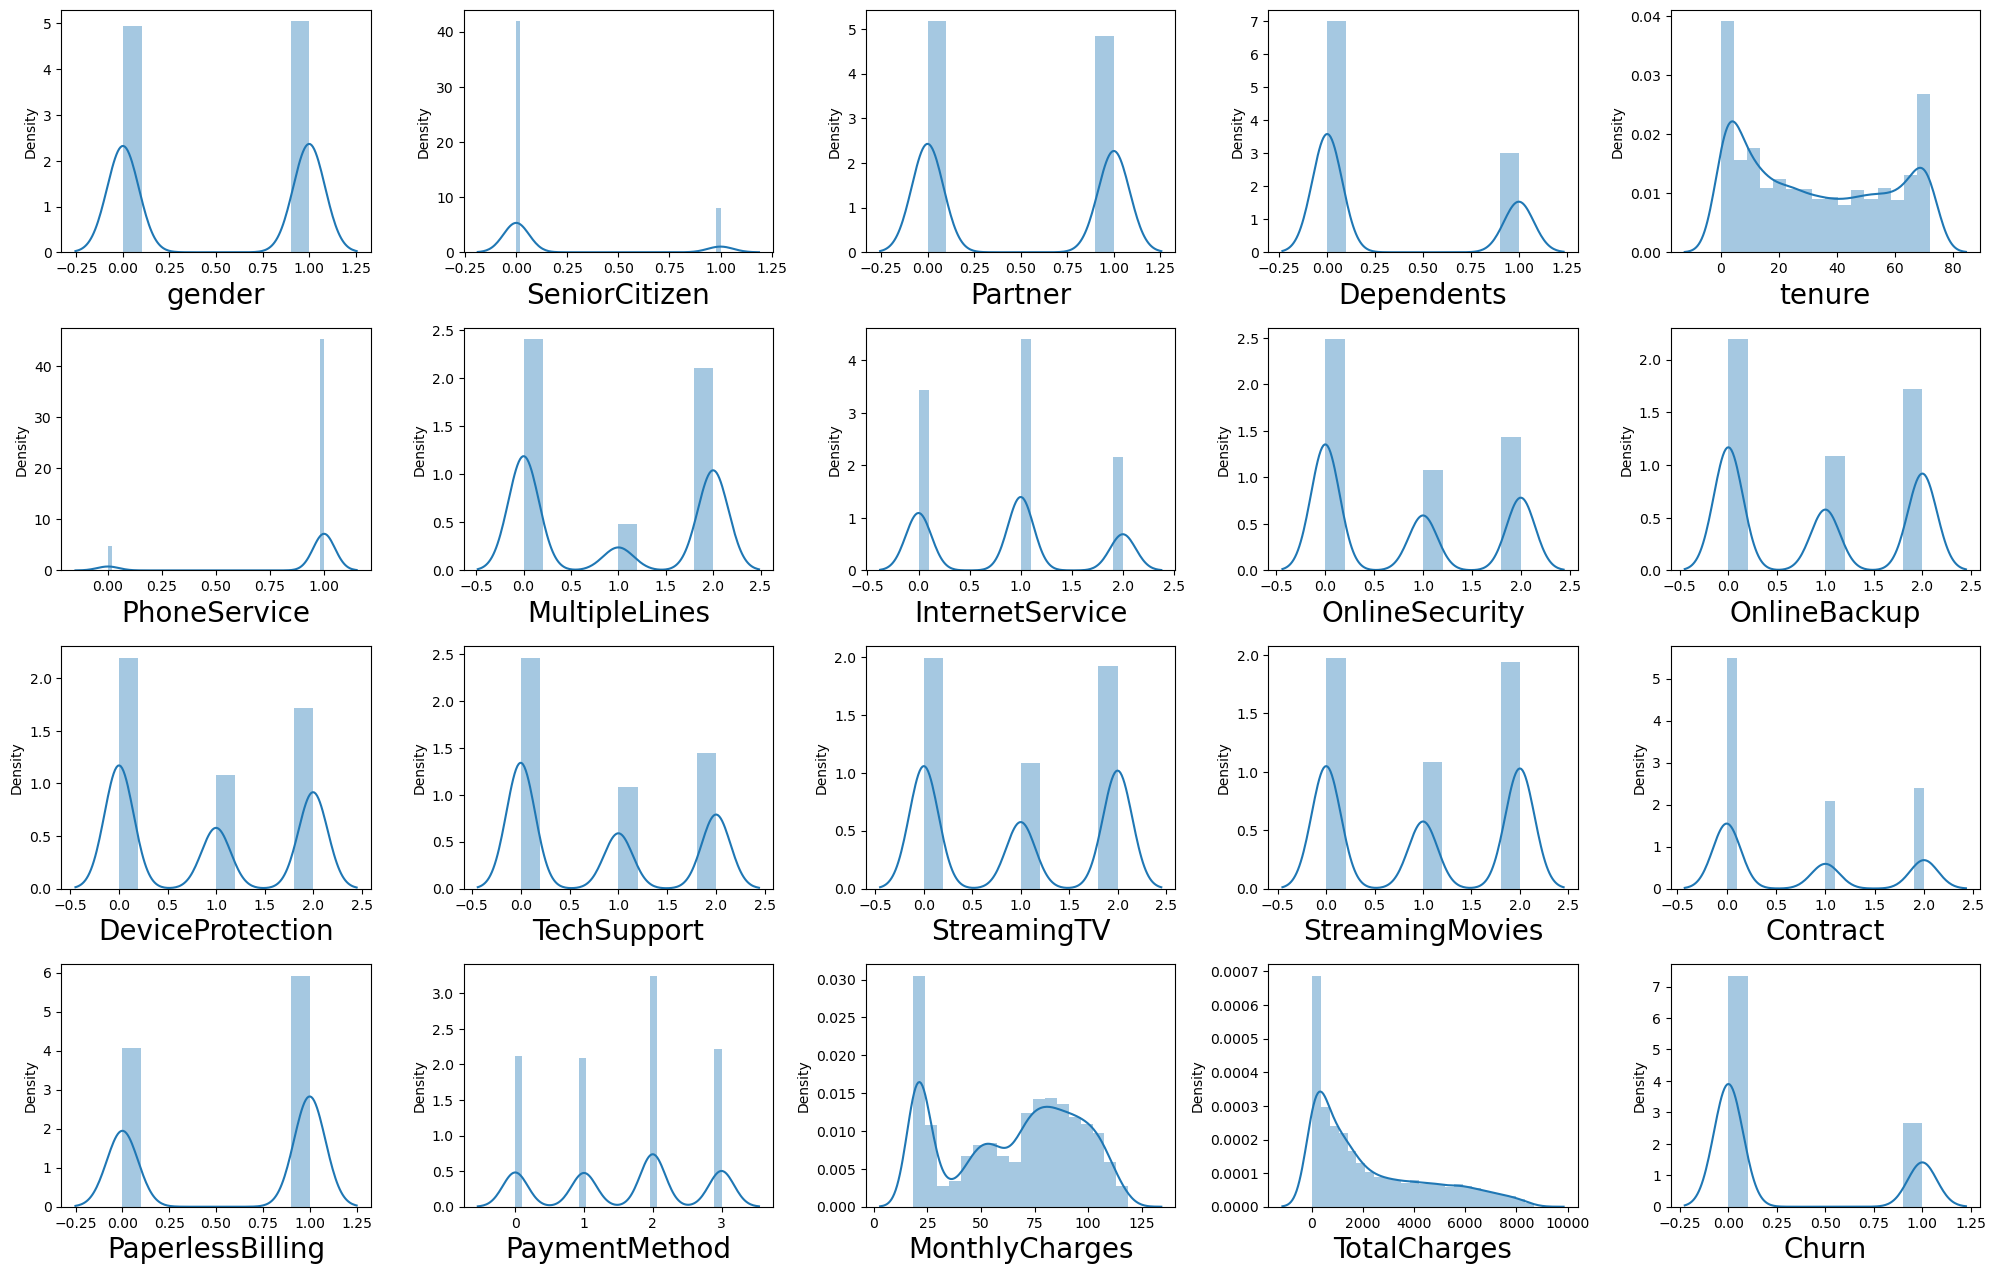

In [111]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df1:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Looks like there is some skewness present in Total Charges,Monthly Charges and Tenure

In [110]:
#Checking for Skewness

df1.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

- Treating Skewness using log transformation

In [112]:


skew_var=['TotalCharges','MonthlyCharges','tenure']

In [113]:
np.log(df1[skew_var]+1).skew()

TotalCharges     -0.745402
MonthlyCharges   -0.719017
tenure           -0.778370
dtype: float64

In [114]:
np.sqrt(df1[skew_var]).skew()

TotalCharges      0.307849
MonthlyCharges   -0.484557
tenure           -0.235999
dtype: float64

In [115]:
df1[skew_var]=np.sqrt(df1[skew_var])

- Heatmap and Correlation

<AxesSubplot:>

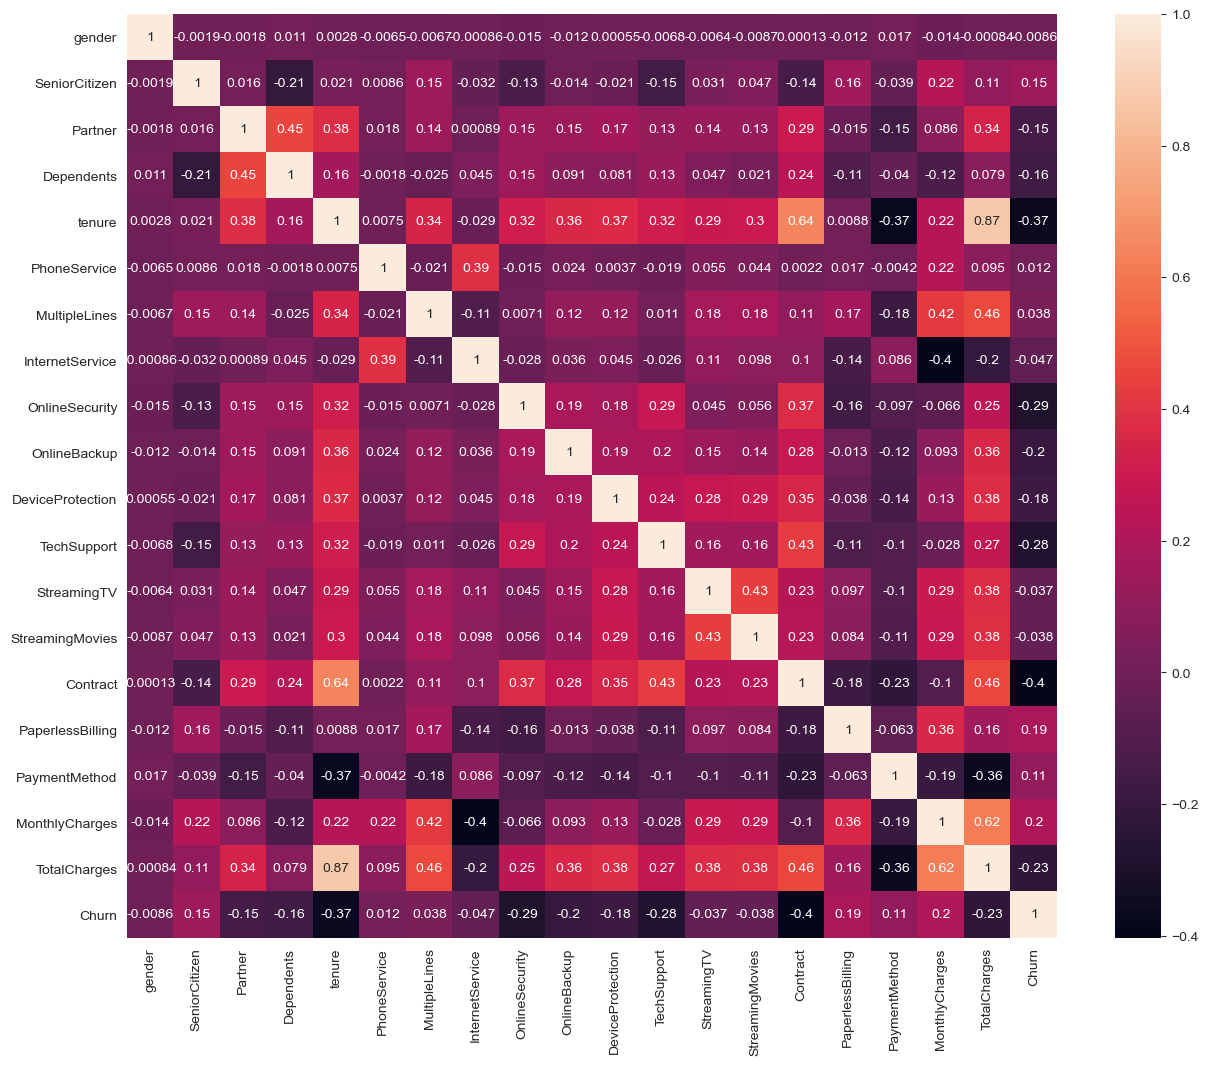

In [119]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,12))
corr = df1.corr()
sns.heatmap(corr, annot=True)

- Multicollinearity looks fine from above heatmap.

# Model Instantiation and Training

In [123]:
#Importing Models and other libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,PrecisionRecallDisplay,plot_confusion_matrix,precision_score,recall_score

In [120]:
X = df1.drop(columns=['Churn'],axis=1) #Splitting feature and target variables in X and y
y = df1['Churn']

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)  #Scaling Feature Data

### Lets find the best random state using LogisticRegression

In [124]:


max_accu = 0
max_rs = 0
for i in range(50,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8273708120386144 on Random State 282


- Splitting data into train and test

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=282)

# Logistic Regression

In [126]:
rslt=[]

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', lr.score(x_train,y_train))
print('TESTING SCORE : ', lr.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8017796289284362
TESTING SCORE :  0.8273708120386144
ACCURACY : 0.8273708120386144
*****************************
[[1185  111]
 [ 193  272]]
*****************************
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1296
           1       0.71      0.58      0.64       465

    accuracy                           0.83      1761
   macro avg       0.79      0.75      0.76      1761
weighted avg       0.82      0.83      0.82      1761



# Random Forest Classifier

In [127]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc.score(x_train,y_train))
print('TESTING SCORE : ', rfc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.9975388110564181
TESTING SCORE :  0.8040885860306644
ACCURACY : 0.8040885860306644
*****************************
[[1176  120]
 [ 225  240]]
*****************************
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1296
           1       0.67      0.52      0.58       465

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.79      0.80      0.80      1761



# Decision Tree Classifier

In [128]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', dt.score(x_train,y_train))
print('TESTING SCORE : ', dt.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.9977281332828474
TESTING SCORE :  0.720045428733674
ACCURACY : 0.720045428733674
*****************************
[[1045  251]
 [ 242  223]]
*****************************
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1296
           1       0.47      0.48      0.47       465

    accuracy                           0.72      1761
   macro avg       0.64      0.64      0.64      1761
weighted avg       0.72      0.72      0.72      1761



# Gradient Boosting Classifier

In [129]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb.score(x_train,y_train))
print('TESTING SCORE : ', gb.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.826391518364256
TESTING SCORE :  0.8194207836456558
ACCURACY : 0.8194207836456558
*****************************
[[1188  108]
 [ 210  255]]
*****************************
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1296
           1       0.70      0.55      0.62       465

    accuracy                           0.82      1761
   macro avg       0.78      0.73      0.75      1761
weighted avg       0.81      0.82      0.81      1761



# KNN Model

In [130]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', kn.score(x_train,y_train))
print('TESTING SCORE : ', kn.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.827906096175691
TESTING SCORE :  0.7717206132879046
ACCURACY : 0.7717206132879046
*****************************
[[1101  195]
 [ 207  258]]
*****************************
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1296
           1       0.57      0.55      0.56       465

    accuracy                           0.77      1761
   macro avg       0.71      0.70      0.70      1761
weighted avg       0.77      0.77      0.77      1761



# Support Vector Classifier

In [131]:
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', svc.score(x_train,y_train))
print('TESTING SCORE : ', svc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8226050738356683
TESTING SCORE :  0.8086314593980692
ACCURACY : 0.8086314593980692
*****************************
[[1193  103]
 [ 234  231]]
*****************************
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1296
           1       0.69      0.50      0.58       465

    accuracy                           0.81      1761
   macro avg       0.76      0.71      0.73      1761
weighted avg       0.80      0.81      0.80      1761



In [132]:
#Creating DataFrame and storing all models result

result_df = pd.DataFrame({"ML Models":["Logistic Regression","Random Forest",
             "Decision Tree","Gradient Boosting","KNN","SVC"],"Score":rslt})
result_df

,ML Models,Score
0,Logistic Regression,0.827371
1,Random Forest,0.804089
2,Decision Tree,0.720045
3,Gradient Boosting,0.819421
4,KNN,0.771721
5,SVC,0.808631


In [133]:
#CROSS VALIDATION SCORE

mean_cv=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Random Forest','Decision Tree','Gradientboost','KNN','SVC']
models=[LogisticRegression(max_iter=1000),RandomForestClassifier(n_estimators=100),DecisionTreeClassifier(),
        GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=9),SVC()]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,x_train,y_train,scoring = "accuracy",cv=3)
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

LogisticRegression(max_iter=1000)
RandomForestClassifier()
DecisionTreeClassifier()
GradientBoostingClassifier()
KNeighborsClassifier(n_neighbors=9)
SVC()


,CV Mean,Std
Logistic Regression,0.799130,0.005365
Random Forest,0.782848,0.001846
Decision Tree,0.721697,0.002747
Gradientboost,0.798183,0.002585
KNN,0.760886,0.002848
SVC,0.791555,0.005071


In [134]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

In [135]:
print('ROC_AUC_SCORE_LOGISTIC_REGRESSION :',roc_auc_score(y_test,lr.predict(x_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rfc.predict(x_test)))
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(x_test)))
print('ROC_AUC_SCORE_GRADIENT_BOOSTING :',roc_auc_score(y_test,gb.predict(x_test)))
print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,kn.predict(x_test)))
print('ROC_AUC_SCORE_SVC :',roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_SCORE_LOGISTIC_REGRESSION : 0.7496490442054958
ROC_AUC_SCORE_RANDOM_FOREST : 0.711768219832736
ROC_AUC_SCORE_DECISION_TREE : 0.6429485264834727
ROC_AUC_SCORE_GRADIENT_BOOSTING : 0.73252688172043
ROC_AUC_SCORE_KNN : 0.7021878733572281
ROC_AUC_SCORE_SVC : 0.7086494424532059


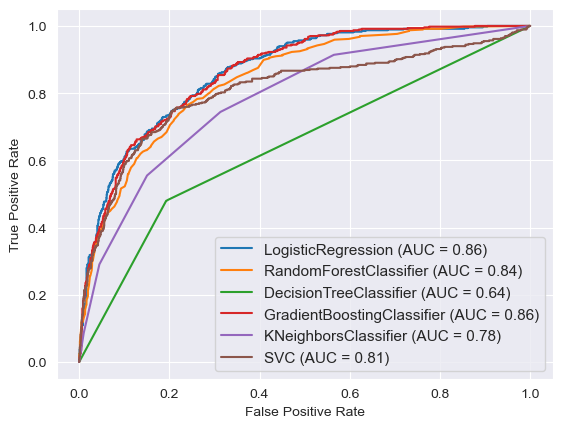

In [136]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

##### As per ROC AUC curve score Logistic Regression and Gradient Boosting Classifier are best fit models.
##### So, we will do Hyperparameter tuning in any one of them.

### Applying Hyperparameter Tuning in Gradient Boosting Classifier.

In [141]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

pprint(gb.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [142]:
params = {'learning_rate':(0.1,0.2,0.3),
         'max_depth':(1,2,3),
         'n_estimators': (100,200,300,400),
         }
grid = GridSearchCV(GradientBoostingClassifier()
                    ,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': (0.1, 0.2, 0.3),
                         'max_depth': (1, 2, 3),
                         'n_estimators': (100, 200, 300, 400)})

In [144]:
best_param = grid.best_params_
best_param

{'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 400}

In [145]:
gb_tuned=GradientBoostingClassifier(n_estimators=400,max_depth=1,learning_rate=0.2)
gb_tuned.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=400)

In [147]:
y_pred_gb = gb_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred_gb)

print('TRAINING SCORE : ', gb_tuned.score(x_train,y_train))
print('TESTING SCORE : ', gb_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred_gb))
print('*****************************')
print(classification_report(y_test,y_pred_gb))

TRAINING SCORE :  0.8074592957213177
TESTING SCORE :  0.8239636570130607
ACCURACY : 0.8239636570130607
*****************************
[[1192  104]
 [ 206  259]]
*****************************
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1296
           1       0.71      0.56      0.63       465

    accuracy                           0.82      1761
   macro avg       0.78      0.74      0.76      1761
weighted avg       0.82      0.82      0.82      1761



 1 = YES 
 0 = NO 


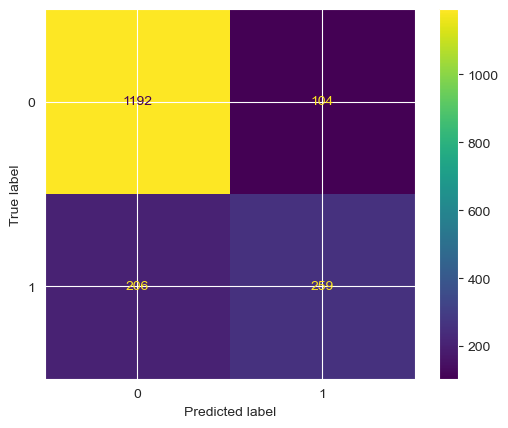

In [150]:
plot_confusion_matrix(gb_tuned,x_test,y_test)

print(" 1 = YES ")
print(" 0 = NO ")

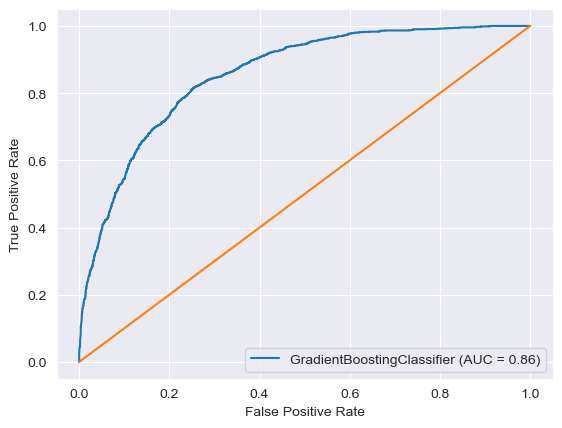

ROC_AUC_SCORE_GRADIENT_BOOSTING_Tuned : 0.7383711668657905


In [152]:
plot_roc_curve(gb_tuned,x_train,y_train)
plt.plot(y_test,y_test)
plt.show()
print('ROC_AUC_SCORE_GRADIENT_BOOSTING_Tuned :',roc_auc_score(y_test,gb_tuned.predict(x_test)))

##### Efficiency Achieved :

- After, hyperparameter tuning we are able to increase roc_auc_score.
- Model accuracy is increased.
- True Positive is increased in confusion matrix.


# Model Saving

In [153]:
import joblib
joblib.dump(gb_tuned,'Customer_churn.pkl')

['Customer_churn.pkl']